Load the 📊`tidyverse`, 🐧`palmerpengions`, and ⚖`scales` packages.

In [7]:
library('tidyverse')

In [5]:
library('palmerpenguins')

In [6]:
library('scales')

In [8]:
penguins %>% head

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


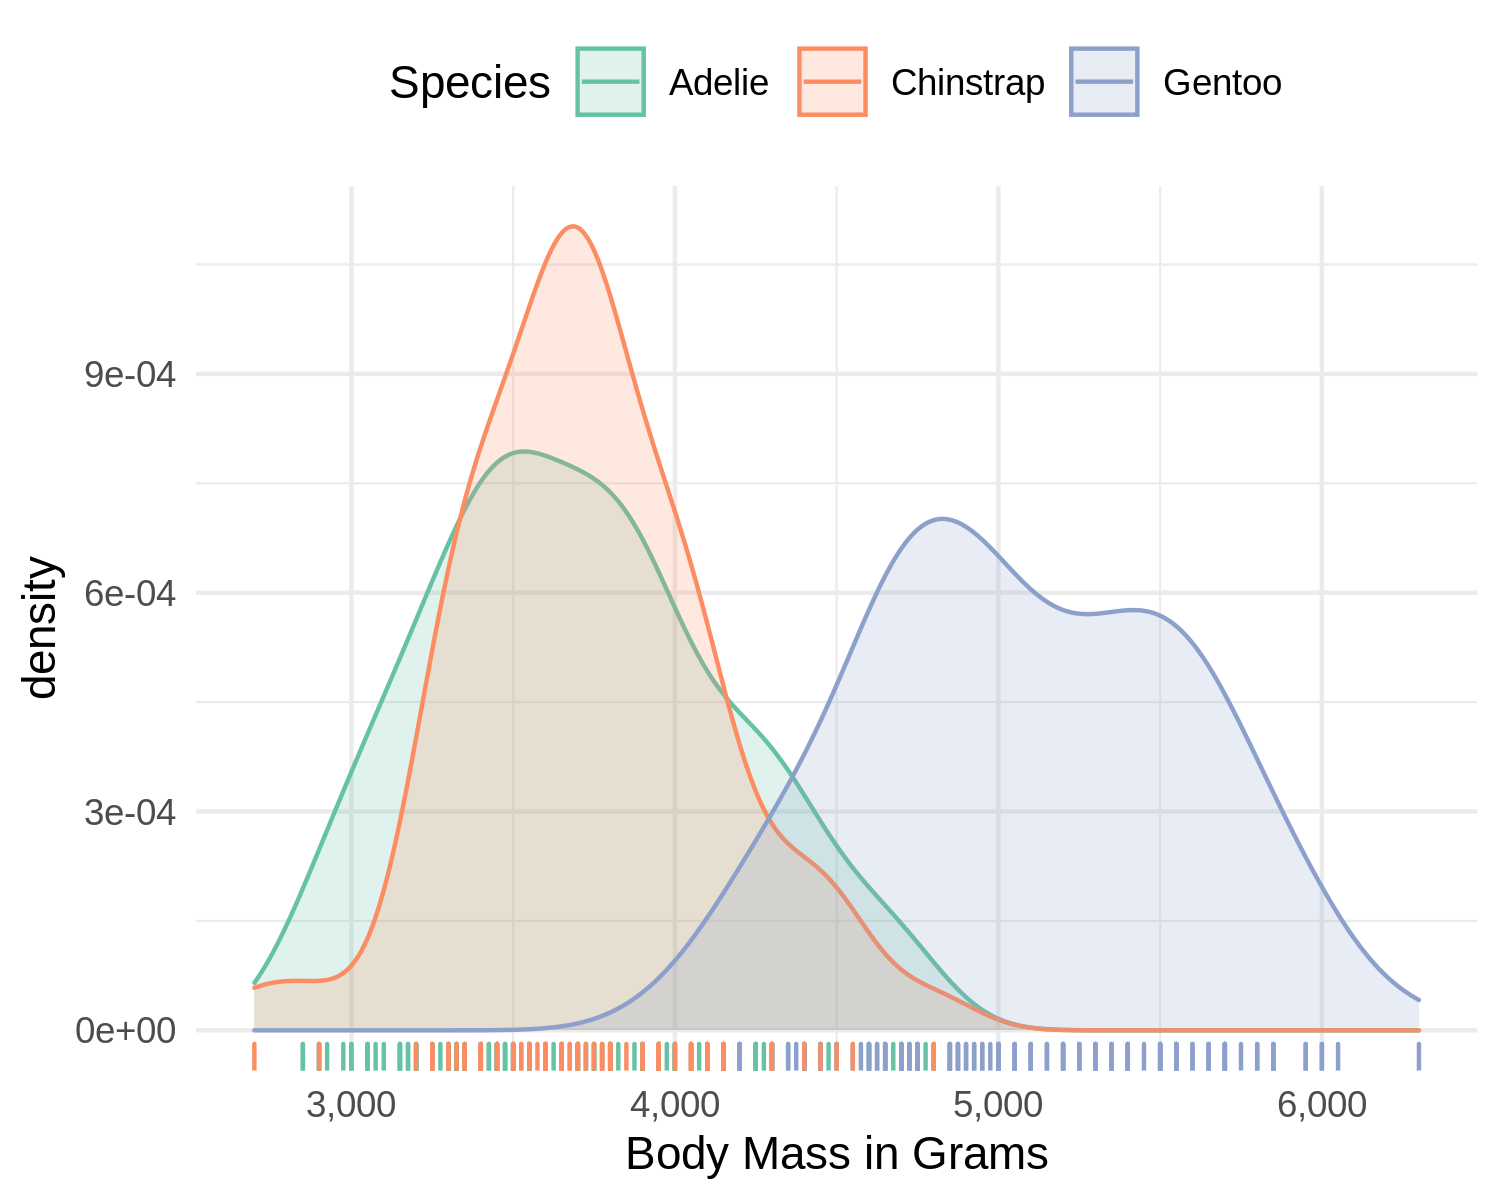

In [20]:
p = ggplot (penguins, aes(x = body_mass_g, color = species, fill = species))

p = p + geom_density(alpha = 0.2, na.rm = TRUE) + geom_rug()

p = p + scale_color_brewer(palette = "Set2") + scale_fill_brewer(palette = "Set2")

p = p + theme_minimal()

p = p + labs(x = "Body Mass in Grams", color = "Species", fill = "Species")

p = p + theme(legend.position = 'top')

p = p + scale_x_continuous(labels = comma)

p

Use `geom_density` to create the following figure from the `penguins` data.

<img src="https://raw.githubusercontent.com/chuckpr/BIOS512/main/in-class-exercises/07/palmer-kde.png" 
     style="width: 700px;" />

In [26]:
penguins %>% head

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>
Adelie,Torgersen,39.1,18.7,181,3750,male,2007
Adelie,Torgersen,39.5,17.4,186,3800,female,2007
Adelie,Torgersen,40.3,18.0,195,3250,female,2007
Adelie,Torgersen,NA,NA,NA,NA,NA,2007
Adelie,Torgersen,36.7,19.3,193,3450,female,2007
Adelie,Torgersen,39.3,20.6,190,3650,male,2007


🛑 **STOP HERE** 🛑

What columns do we need to make the **ECDF** equivalent of the above chart using `geom_point` + `geom_line`?

Read the following code snippet. Can you make sense of what it's doing? What do you think the output will be?

```R
ecdf = penguins %>%
    arrange(body_mass_g) %>%
    group_by(species) %>%
    mutate(rn = row_number(), fraction_of_penguins = rn / max(rn))
```

Copy the snippet above and execute it. What's does the `ecdf` table look like?

In [23]:
ecdf = penguins %>%
    arrange(body_mass_g) %>%
    group_by(species) %>%
    mutate(rn = row_number(), fraction_of_penguins = rn / max(rn))

In [27]:
ecdf %>% filter (rn == 1)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,rn,fraction_of_penguins
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>,<int>,<int>,<dbl>
Chinstrap,Dream,46.9,16.6,192,2700,female,2008,1,0.014705882
Adelie,Biscoe,36.5,16.6,181,2850,female,2008,1,0.006578947
Gentoo,Biscoe,42.7,13.7,208,3950,female,2008,1,0.008064516


Using the `ecdf` table, create an **ECDF** chart of penguin body mass grouped by species.

Warning message:
“Removed 2 row(s) containing missing values (geom_path).”


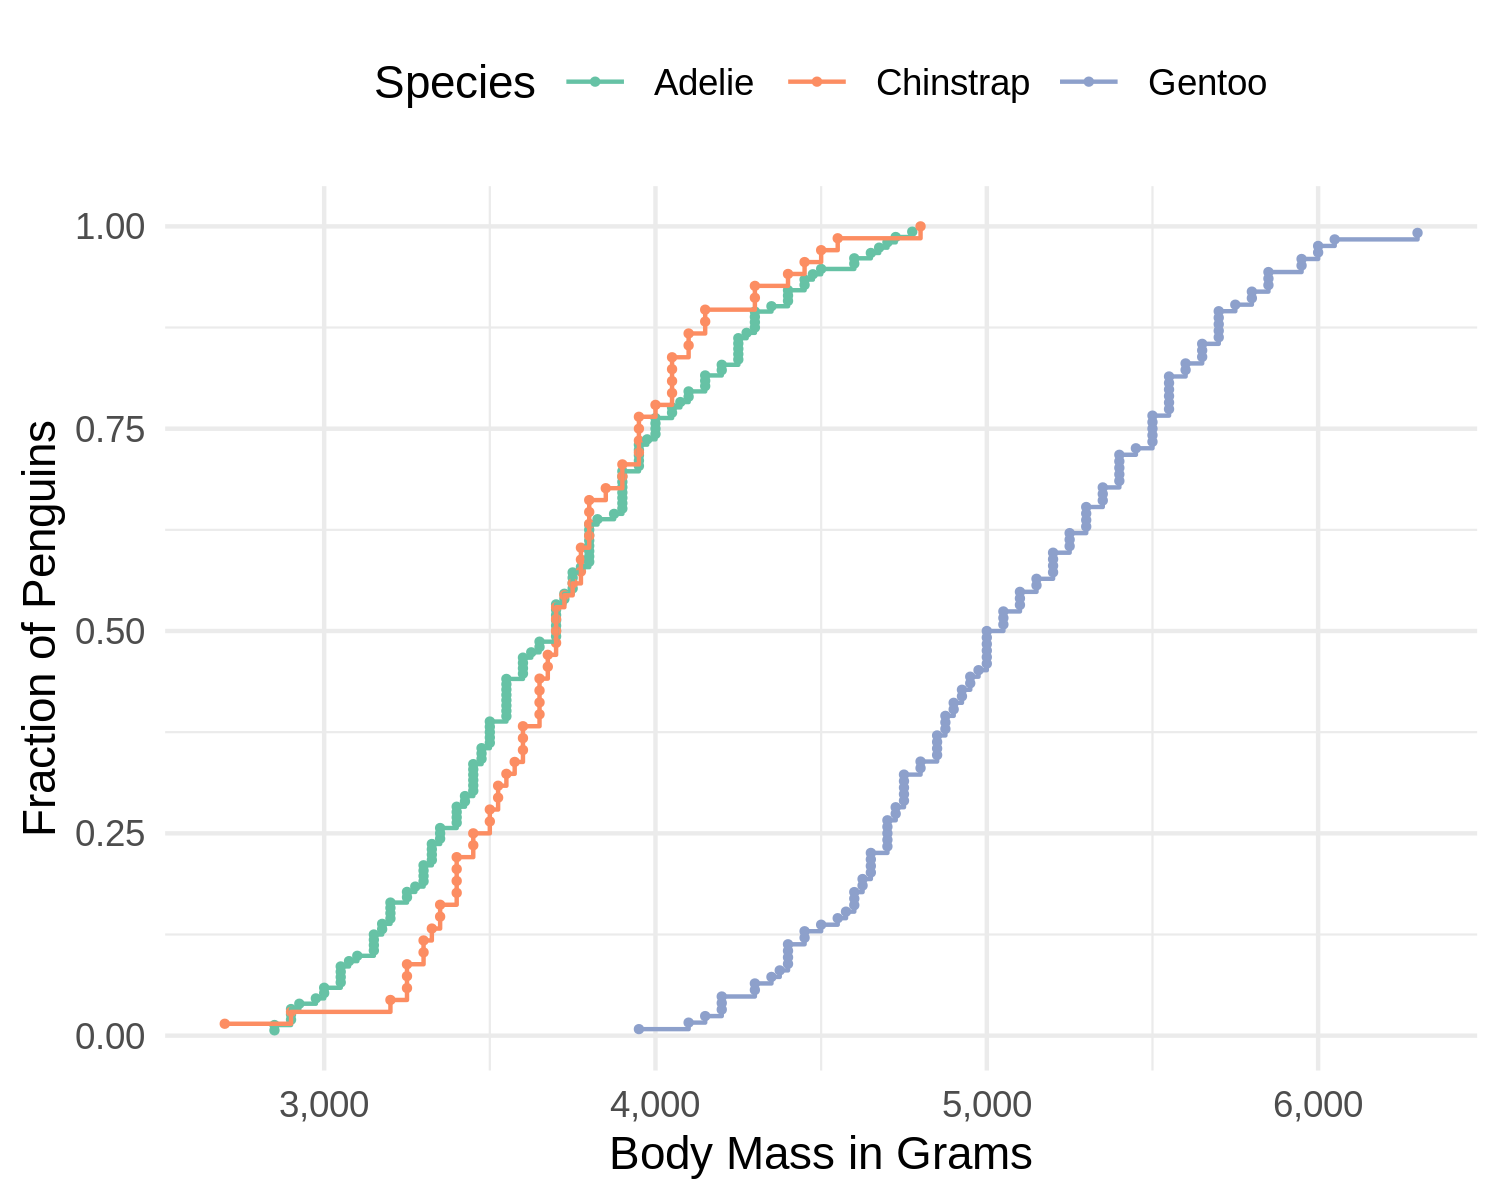

In [35]:
p = ggplot (ecdf, aes(x = body_mass_g, y = fraction_of_penguins, color = species))

p = p + geom_point(size = 0.5, na.rm = TRUE) + geom_step()

p = p + scale_color_brewer(palette = "Set2") + scale_fill_brewer(palette = "Set2")

p = p + theme_minimal()

p = p + labs(x = "Body Mass in Grams", y = "Fraction of Penguins", color = "Species")

p = p + theme(legend.position = 'top')

p = p + scale_x_continuous(labels = comma)

p

Uncomment the code below, change the cell to markdown and execute if you want to see my solution.

In [ ]:
# ![](https://raw.githubusercontent.com/chuckpr/BIOS512/main/in-class-exercises/07/palmer-ecdf.png)